In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
titanic=pd.read_csv("C:/Users/91701/OneDrive/Desktop/titanic_train.csv", sep=",")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_2=titanic.drop(["PassengerId","Name","Ticket","Cabin","SibSp","Parch"], axis=1)
titanic_2

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S
887,1,1,female,19.0,30.0000,S
888,0,3,female,NaN,23.4500,S
889,1,1,male,26.0,30.0000,C


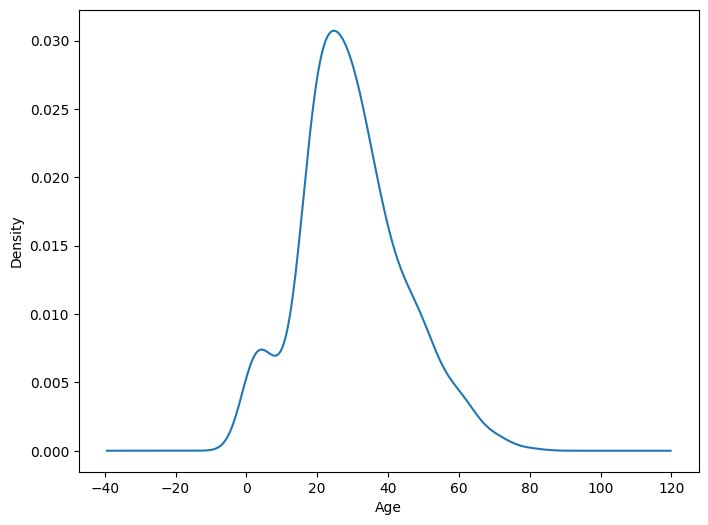

In [6]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=[8,6]
titanic_2["Age"].plot(kind='kde')
plt.xlabel('Age')
plt.show()

In [7]:
titanic_2['Age_mean']=titanic_2['Age'].fillna(titanic_2["Age"].mean())
titanic_2

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_mean
0,0,3,male,22.0,7.2500,S,22.000000
1,1,1,female,38.0,71.2833,C,38.000000
2,1,3,female,26.0,7.9250,S,26.000000
3,1,1,female,35.0,53.1000,S,35.000000
4,0,3,male,35.0,8.0500,S,35.000000
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,27.000000
887,1,1,female,19.0,30.0000,S,19.000000
888,0,3,female,NaN,23.4500,S,29.699118
889,1,1,male,26.0,30.0000,C,26.000000


In [8]:
titanic_2['Age_median']=titanic_2['Age'].fillna(titanic_2["Age"].median())
titanic_2

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_mean,Age_median
0,0,3,male,22.0,7.2500,S,22.000000,22.0
1,1,1,female,38.0,71.2833,C,38.000000,38.0
2,1,3,female,26.0,7.9250,S,26.000000,26.0
3,1,1,female,35.0,53.1000,S,35.000000,35.0
4,0,3,male,35.0,8.0500,S,35.000000,35.0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,27.000000,27.0
887,1,1,female,19.0,30.0000,S,19.000000,19.0
888,0,3,female,NaN,23.4500,S,29.699118,28.0
889,1,1,male,26.0,30.0000,C,26.000000,26.0


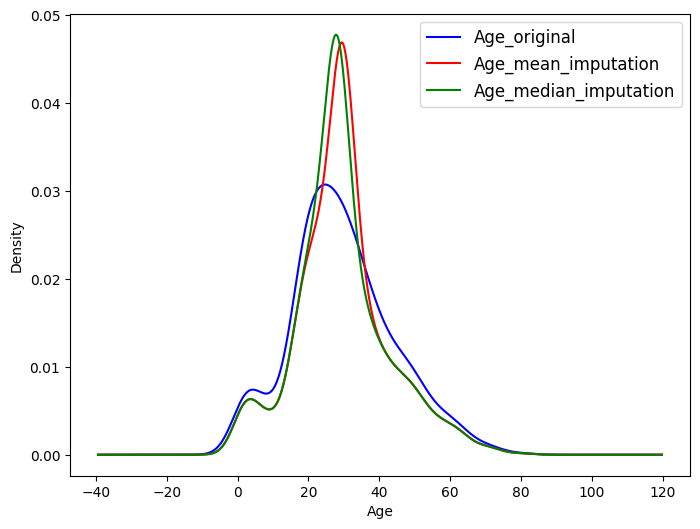

In [9]:
plt.rcParams["figure.figsize"]=[8,6]
titanic_2["Age"].plot(kind='kde', label='Age_original', c='b')
titanic_2["Age_mean"].plot(kind='kde', label='Age_mean_imputation', c='r')
titanic_2["Age_median"].plot(kind='kde', label='Age_median_imputation', c='g')
plt.legend(loc='best', fontsize=12)
plt.xlabel('Age')
plt.show()


In [10]:
# decided to remove missing datasets
titanic_2.dropna(inplace=True)
titanic_3=titanic_2.drop(['Age_mean','Age_median'], axis=1)
titanic_3

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...
885,0,3,female,39.0,29.1250,Q
886,0,2,male,27.0,13.0000,S
887,1,1,female,19.0,30.0000,S
889,1,1,male,26.0,30.0000,C


In [11]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
le.fit(titanic_3["Sex"])
titanic_3["le_Sex"]=le.transform(titanic_3['Sex'])
le.fit(titanic_3["Embarked"])
titanic_3["le_Embarked"]=le.transform(titanic_3["Embarked"])
features=titanic_3.drop(["Survived","Sex","Embarked"],axis=1)
labels=titanic_3[['Survived']]
features

,Pclass,Age,Fare,le_Sex,le_Embarked
0,3,22.0,7.2500,1,2
1,1,38.0,71.2833,0,0
2,3,26.0,7.9250,0,2
3,1,35.0,53.1000,0,2
4,3,35.0,8.0500,1,2
...,...,...,...,...,...
885,3,39.0,29.1250,0,1
886,2,27.0,13.0000,1,2
887,1,19.0,30.0000,0,2
889,1,26.0,30.0000,1,0


In [12]:
# feature standardization

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X=sc.fit_transform(features)
X

array([[ 0.90859974, -0.52766856, -0.51637992,  0.75613751,  0.51958818],
       [-1.48298257,  0.57709388,  0.69404605, -1.32251077, -2.04948671],
       [ 0.90859974, -0.25147795, -0.50362035, -1.32251077,  0.51958818],
       ...,
       [-1.48298257, -0.73481151, -0.08633507, -1.32251077,  0.51958818],
       [-1.48298257, -0.25147795, -0.08633507,  0.75613751, -2.04948671],
       [ 0.90859974,  0.16280796, -0.50692839,  0.75613751, -0.76494927]])

In [21]:
from sklearn.linear_model import LogisticRegression

lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
y_pred=lr_clf.predict(X_test)

C:\Users\91701\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_lr=accuracy_score(y_test,y_pred)
conf_mat_lr=confusion_matrix(y_test,y_pred)
clf_report_lr=classification_report(y_test,y_pred)

accuracy_lr, conf_mat_lr, clf_report_lr

(0.8111888111888111,
 array([[72, 10],
        [17, 44]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.81      0.88      0.84        82\n           1       0.81      0.72      0.77        61\n\n    accuracy                           0.81       143\n   macro avg       0.81      0.80      0.80       143\nweighted avg       0.81      0.81      0.81       143\n')

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train,y_train)
y_pred_knn=knn_clf.predict(X_test)

C:\Users\91701\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [24]:
accuracy_knn=accuracy_score(y_test,y_pred_knn)
conf_mat_knn=confusion_matrix(y_test,y_pred_knn)
clf_report_knn=classification_report(y_test,y_pred_knn)

accuracy_knn, conf_mat_knn, clf_report_knn

(0.7972027972027972,
 array([[75,  7],
        [22, 39]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.77      0.91      0.84        82\n           1       0.85      0.64      0.73        61\n\n    accuracy                           0.80       143\n   macro avg       0.81      0.78      0.78       143\nweighted avg       0.81      0.80      0.79       143\n')

In [25]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)

C:\Users\91701\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
accuracy_svc=accuracy_score(y_test,y_pred_svc)
conf_mat_svc=confusion_matrix(y_test,y_pred_svc)
clf_report_svc=classification_report(y_test,y_pred_svc)

accuracy_svc, conf_mat_svc, clf_report_svc

(0.7832167832167832,
 array([[75,  7],
        [24, 37]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.76      0.91      0.83        82\n           1       0.84      0.61      0.70        61\n\n    accuracy                           0.78       143\n   macro avg       0.80      0.76      0.77       143\nweighted avg       0.79      0.78      0.78       143\n')

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier(n_estimators=500, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf=rf_clf.predict(X_test)

C:\Users\91701\AppData\Local\Temp\ipykernel_20516\4183925304.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


In [28]:
accuracy_rf=accuracy_score(y_test,y_pred_rf)
conf_mat_rf=confusion_matrix(y_test,y_pred_rf)
clf_report_rf=classification_report(y_test,y_pred_rf)

accuracy_rf, conf_mat_rf, clf_report_rf

(0.8041958041958042,
 array([[69, 13],
        [15, 46]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.82      0.84      0.83        82\n           1       0.78      0.75      0.77        61\n\n    accuracy                           0.80       143\n   macro avg       0.80      0.80      0.80       143\nweighted avg       0.80      0.80      0.80       143\n')

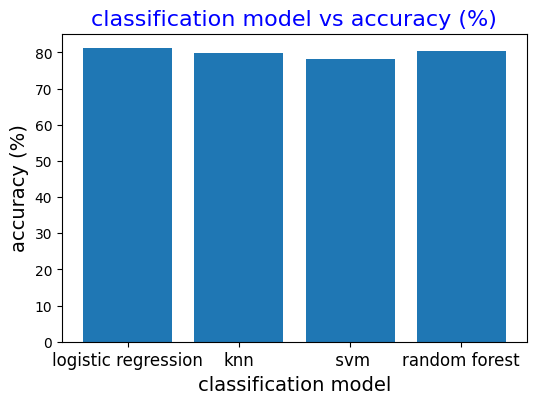

In [29]:
accuracy_total=[accuracy_lr*100, accuracy_knn*100, accuracy_svc*100, accuracy_rf*100]
accuracy_label=["logistic regression",'knn', ' svm', 'random forest']
plt.rcParams["figure.figsize"]=[6,4]
plt.bar(accuracy_label,accuracy_total)
plt.title("classification model vs accuracy (%)", size=16, c='b')
plt.xlabel("classification model", size=14)
plt.ylabel("accuracy (%)", size=14)
plt.xticks(accuracy_label, size=12)
plt.show()